# Exploratory Data Analysis (EDA)

Here we explore the <a href="https://www.cityscapes-dataset.com/">Cityscapes</a> dataset

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

2022-10-24 23:11:54.066650: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 23:11:54.541931: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-24 23:11:55.484473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/root/usr/lib:/root/tools/miniconda3/lib/:/root/tools/miniconda3/lib/
2022-10-24 23:11:55.484562: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugi

## Cityscapes

We now explore the Cityscapes dataset using the tensorflow_datasets library (more information <a href="https://www.tensorflow.org/datasets">here</a>)

In [2]:
(train_ds, test_ds, val_ds), ds_info = tfds.load(
                                            'cityscapes',
                                            shuffle_files=True,
                                            split=['train', 'test', 'validation'],
                                            with_info=True
                                        )

2022-10-24 23:11:57.186361: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-24 23:11:57.224637: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-24 23:11:57.224948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-24 23:11:57.227000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Let's print out the info we asked for about the dataset

In [3]:
print(ds_info)

tfds.core.DatasetInfo(
    name='cityscapes',
    full_name='cityscapes/semantic_segmentation/1.0.0',
    description="""
    Cityscapes is a dataset consisting of diverse urban street scenes across 50 different cities
    at varying times of the year as well as ground truths for several vision tasks including
    semantic segmentation, instance level segmentation (TODO), and stereo pair disparity inference.
    
    For segmentation tasks (default split, accessible via 'cityscapes/semantic_segmentation'), Cityscapes provides
    dense pixel level annotations for 5000 images at 1024 * 2048 resolution pre-split into training (2975),
    validation (500) and test (1525) sets. Label annotations for segmentation tasks span across 30+ classes
    commonly encountered during driving scene perception. Detailed label information may be found here:
    https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py#L52-L99
    
    Cityscapes also provides coarse gr

## Showing Examples

,image_id,image_left,segmentation_label
0,strasbourg_000001_020904,,
1,dusseldorf_000192_000019,,
2,dusseldorf_000203_000019,,
3,aachen_000022_000019,,
4,hanover_000000_028202,,
5,dusseldorf_000195_000019,,
6,strasbourg_000000_035713,,
7,hanover_000000_034141,,
8,dusseldorf_000070_000019,,
9,dusseldorf_000038_000019,,

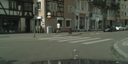
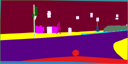
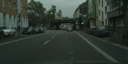
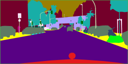
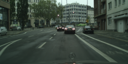
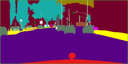
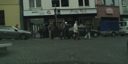
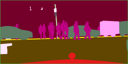
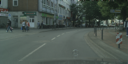
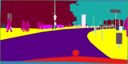
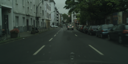
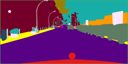
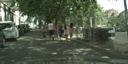
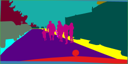
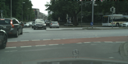
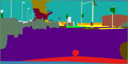
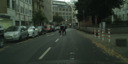
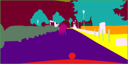
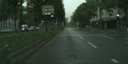
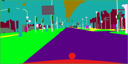

In [4]:
tfds.as_dataframe(train_ds.take(10), ds_info)

Checking <a href="https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py#L52-L99">this</a> page we get a lot more information about the labels of the images, which we convert into a dictionary of labels that we actually plan to use during training

In [3]:
all_labels = {
    0: 'unlabeled',
    1: 'ego vehicle',
    2: 'rectification border',
    3: 'out of roi',
    4: 'static',
    5: 'dynamic',
    6: 'ground',
    7: 'road',
    8: 'sidewalk',
    9: 'parking',
    10: 'rail track',
    11: 'building',
    12: 'wall',
    13: 'fence',
    14: 'guard rail',
    15: 'bridge',
    16: 'tunnel',
    17: 'pole',
    18: 'polegroup',
    19: 'traffic light',
    20: 'traffic sign',
    21: 'vegetation',
    22: 'terrain',
    23: 'sky',
    24: 'person',
    25: 'rider',
    26: 'car',
    27: 'truck',
    28: 'bus',
    29: 'caravan',
    30: 'trailer',
    31: 'train',
    32: 'motorcycle',
    33: 'bicycle',
    -1: 'license plate'
}

# format is id:name and this contains only the classes I intend to train on
my_labels = {
    0: 'unlabeled',
    7: 'road',
    8: 'sidewalk',
    11: 'building',
    12: 'wall',
    13: 'fence',
    17: 'pole',
    19: 'traffic light',
    20: 'traffic sign',
    21: 'vegetation',
    22: 'terrain',
    23: 'sky',
    24: 'person',
    25: 'rider',
    26: 'car',
    27: 'truck',
    28: 'bus',
    31: 'train',
    32: 'motorcycle',
    33: 'bicycle'
}

We decide to downsample the images to make training more tractable

{'image_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image_left': TensorSpec(shape=(205, 410, 3), dtype=tf.uint8, name=None), 'segmentation_label': TensorSpec(shape=(205, 410, 1), dtype=tf.uint8, name=None)}


,image_id,image_left,segmentation_label
0,cologne_000088_000019,,
1,aachen_000022_000019,,
2,weimar_000099_000019,,
3,strasbourg_000001_055273,,
4,stuttgart_000184_000019,,
5,monchengladbach_000000_007098,,
6,jena_000003_000019,,
7,erfurt_000018_000019,,
8,dusseldorf_000053_000019,,
9,dusseldorf_000099_000019,,

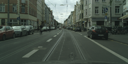
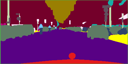
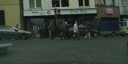
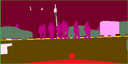
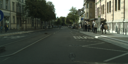
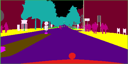
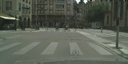
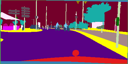
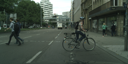
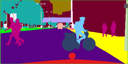
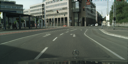
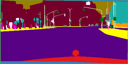
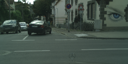
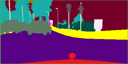
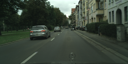
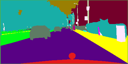
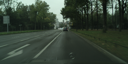
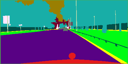
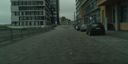
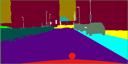

In [4]:
def downsample(x):
    x['image_left'] = x['image_left'][::5, ::5]
    x['segmentation_label'] = x['segmentation_label'][::5, ::5]
    return x

train_ds = train_ds.map(downsample, num_parallel_calls=tf.data.AUTOTUNE)
print(train_ds.element_spec)
tfds.as_dataframe(train_ds.take(10), ds_info)

## Checking Class Imbalance

Most segmentation datasets have imbalanced classes, and we don't expect this one to be any different, let's check how imbalanced the classes are in the normal state and after we reclassify images to only use the classes we are interested in

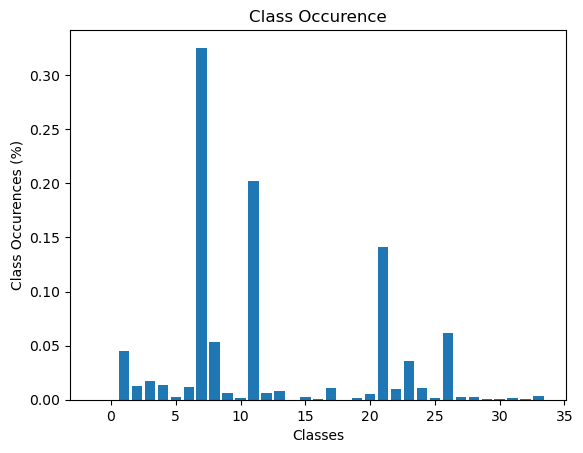

In [5]:
classes = {x:0 for x in range(-1, 34)}
for x in tfds.as_numpy(train_ds):
        for label in all_labels.keys():
                classes[label] += np.sum(x['segmentation_label'] == label)
pixels = [classes[label] for label in all_labels.keys()]
percentages = np.array(pixels)/np.sum(pixels)
plt.bar(all_labels.keys(), percentages)
plt.title('Class Occurence')
plt.xlabel('Classes')
plt.ylabel('Class Occurences (%)')
plt.show()

From this we can see that that classes 7 (road) and 11 (building) are dominant with 21 (vegetation) and 26 (car) close behind, and some classes are barely present at all (like 14 [guard rail])

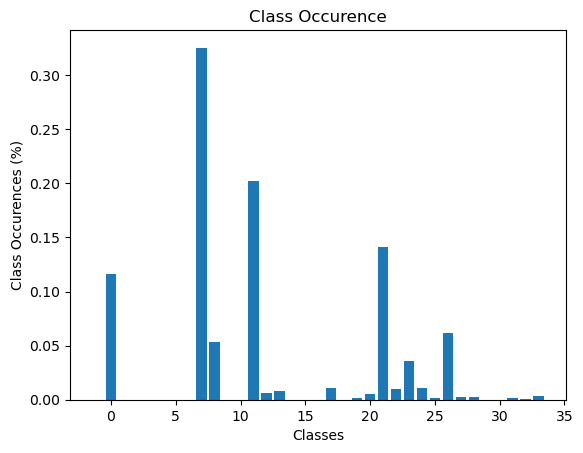

In [7]:
classes = {x:0 for x in range(-1, 34)}
# We map the classes to just the classes I want to use then repeat the analysis
def convert_to_my_labels(x):
    for label in all_labels.keys():
        if label not in my_labels.keys():
            x['segmentation_label'] -= tf.cast(x['segmentation_label'] == label, tf.uint8)*label
    return x

train_ds = train_ds.map(convert_to_my_labels, num_parallel_calls=tf.data.AUTOTUNE)

for x in tfds.as_numpy(train_ds):
    for label in all_labels.keys():
        classes[label] += np.sum(x['segmentation_label'] == label)
pixels = [classes[label] for label in all_labels.keys()]
percentages = np.array(pixels)/np.sum(pixels)
plt.bar(all_labels.keys(), percentages)
plt.title('Class Occurence')
plt.xlabel('Classes')
plt.ylabel('Class Occurences (%)')
plt.show()

As expected 0 (unlabeled) went from essentially nonexistent to significantly more present

We now print the percentages of the dataset that each class we left in the dataset represents for use in correcting for the imbalanced classes in the dataset

In [8]:
my_percentages = {}
for label in my_labels:
    my_percentages[label] = classes[label]/sum(pixels)
print('Percentages')
print(my_percentages)

Percentages
{0: 0.11589730402571499, 7: 0.32541957518283937, 8: 0.053695081459115473, 11: 0.20203883842650683, 12: 0.0057854158439104375, 13: 0.007741762356340514, 17: 0.01085204785066912, 19: 0.0018381535600557892, 20: 0.0048756252530756505, 21: 0.14110377276431096, 22: 0.010209161213563356, 23: 0.03585352056349012, 24: 0.010762237363714075, 25: 0.0011937072270907173, 26: 0.06171617334619749, 27: 0.002362079394518069, 28: 0.0020769949859777343, 31: 0.0020543434030364078, 32: 0.0008705702388034333, 33: 0.0036536355410694914}
